In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=39857811d2cdba770d8a0321298dc989f13500850df0649ae7d88983215376e1
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/binary/balanced/em_1.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/binary/imbalanced/em_1.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/balanced/em_1.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/imbalanced/em_1.csv'

In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#UNI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.1723268032073975. Accuracy: 42.46073% F1-macro: 41.24% F1-weighted: 41.35% cohen_kappa: 0.23%
Iteration: 2000. Loss: 1.1307556629180908. Accuracy: 47.90576% F1-macro: 46.12% F1-weighted: 46.26% cohen_kappa: 0.30%
Iteration: 3000. Loss: 1.193664312362671. Accuracy: 47.95812% F1-macro: 46.14% F1-weighted: 46.27% cohen_kappa: 0.31%
Iteration: 4000. Loss: 1.261707067489624. Accuracy: 46.91099% F1-macro: 45.97% F1-weighted: 46.04% cohen_kappa: 0.29%
Iteration: 5000. Loss: 1.2112772464752197. Accuracy: 50.73298% F1-macro: 48.44% F1-weighted: 48.60% cohen_kappa: 0.34%
Iteration: 6000. Loss: 1.2424371242523193. Accuracy: 51.88482% F1-macro: 52.46% F1-weighted: 52.53% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.262838363647461. Accuracy: 51.93717% F1-macro: 49.77% F1-weighted: 49.87% cohen_kappa: 0.36%
Iteration: 8000. Loss: 1.0638129711151123. Accuracy: 52.82723% F1-macro: 53.11% F1-weighted: 53.16% cohen_kappa: 0.37%
Iteration: 9000. Loss: 1.

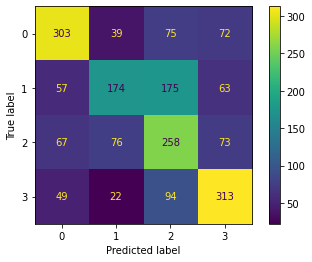

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)
predictions = []

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            y_pred = []
            y_true = []
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)



                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.239058256149292. Accuracy: 46.12565% F1-macro: 44.66% F1-weighted: 44.80% cohen_kappa: 0.28%
Iteration: 2000. Loss: 1.2346256971359253. Accuracy: 48.84817% F1-macro: 48.73% F1-weighted: 48.84% cohen_kappa: 0.32%
Iteration: 3000. Loss: 1.0309252738952637. Accuracy: 49.16230% F1-macro: 48.11% F1-weighted: 48.20% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.2305667400360107. Accuracy: 50.94241% F1-macro: 50.16% F1-weighted: 50.29% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.060624361038208. Accuracy: 52.61780% F1-macro: 51.02% F1-weighted: 51.14% cohen_kappa: 0.37%
Iteration: 6000. Loss: 1.1187682151794434. Accuracy: 53.03665% F1-macro: 52.93% F1-weighted: 53.01% cohen_kappa: 0.37%
Iteration: 7000. Loss: 1.1380401849746704. Accuracy: 53.82199% F1-macro: 52.57% F1-weighted: 52.67% cohen_kappa: 0.38%
Iteration: 8000. Loss: 0.9870312809944153. Accuracy: 53.35079% F1-macro: 52.58% F1-weighted: 52.65% cohen_kappa: 0.38%
Iteration: 9000. Loss: 1

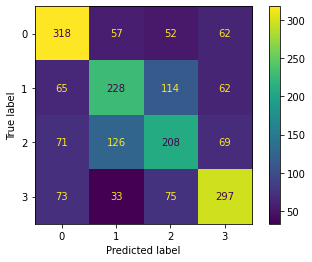

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional

      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()


RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.3112248182296753. Accuracy: 42.87958% F1-macro: 41.80% F1-weighted: 41.91% cohen_kappa: 0.24%
Iteration: 2000. Loss: 1.2130041122436523. Accuracy: 48.11518% F1-macro: 45.03% F1-weighted: 45.21% cohen_kappa: 0.31%
Iteration: 3000. Loss: 1.2175942659378052. Accuracy: 49.16230% F1-macro: 46.73% F1-weighted: 46.90% cohen_kappa: 0.32%
Iteration: 4000. Loss: 1.2055625915527344. Accuracy: 49.16230% F1-macro: 48.73% F1-weighted: 48.82% cohen_kappa: 0.32%
Iteration: 5000. Loss: 1.2536100149154663. Accuracy: 51.30890% F1-macro: 50.21% F1-weighted: 50.28% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.3671715259552002. Accuracy: 51.62304% F1-macro: 51.84% F1-weighted: 51.92% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.1152067184448242. Accuracy: 51.51832% F1-macro: 51.43% F1-weighted: 51.49% cohen_kappa: 0.35%
Iteration: 8000. Loss: 1.319291353225708. Accuracy: 52.09424% F1-macro: 52.40% F1-weighted: 52.48% cohen_kappa: 0.36%
Iteration: 9000. Loss: 

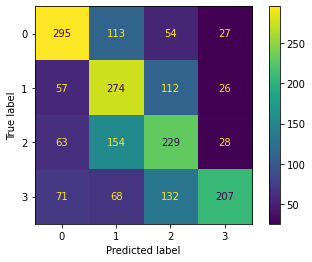

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)


      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.25779390335083. Accuracy: 45.34031% F1-macro: 41.37% F1-weighted: 41.48% cohen_kappa: 0.27%
Iteration: 2000. Loss: 1.4162757396697998. Accuracy: 48.69110% F1-macro: 47.92% F1-weighted: 48.06% cohen_kappa: 0.32%
Iteration: 3000. Loss: 1.1818819046020508. Accuracy: 45.02618% F1-macro: 41.54% F1-weighted: 41.64% cohen_kappa: 0.27%
Iteration: 4000. Loss: 1.2574903964996338. Accuracy: 51.88482% F1-macro: 51.76% F1-weighted: 51.86% cohen_kappa: 0.36%
Iteration: 5000. Loss: 1.2889058589935303. Accuracy: 50.99476% F1-macro: 50.01% F1-weighted: 50.12% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.2175772190093994. Accuracy: 53.56021% F1-macro: 52.21% F1-weighted: 52.34% cohen_kappa: 0.38%
Iteration: 7000. Loss: 1.2303913831710815. Accuracy: 54.92147% F1-macro: 53.28% F1-weighted: 53.42% cohen_kappa: 0.40%
Iteration: 8000. Loss: 1.2344716787338257. Accuracy: 53.03665% F1-macro: 51.79% F1-weighted: 51.91% cohen_kappa: 0.37%
Iteration: 9000. Loss: 1

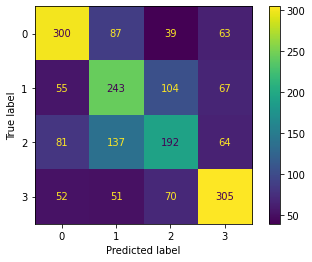

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2815996408462524. Accuracy: 45.54974% F1-macro: 42.04% F1-weighted: 42.17% cohen_kappa: 0.27%
Iteration: 2000. Loss: 1.4360415935516357. Accuracy: 45.28796% F1-macro: 45.54% F1-weighted: 45.64% cohen_kappa: 0.27%
Iteration: 3000. Loss: 1.2606174945831299. Accuracy: 50.94241% F1-macro: 48.06% F1-weighted: 48.18% cohen_kappa: 0.35%
Iteration: 4000. Loss: 1.1446574926376343. Accuracy: 52.61780% F1-macro: 52.10% F1-weighted: 52.20% cohen_kappa: 0.37%
Iteration: 5000. Loss: 1.2478901147842407. Accuracy: 50.94241% F1-macro: 50.69% F1-weighted: 50.77% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.2186362743377686. Accuracy: 54.97382% F1-macro: 54.24% F1-weighted: 54.35% cohen_kappa: 0.40%
Iteration: 7000. Loss: 1.0764596462249756. Accuracy: 52.56545% F1-macro: 50.64% F1-weighted: 50.77% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.3516286611557007. Accuracy: 49.52880% F1-macro: 49.58% F1-weighted: 49.62% cohen_kappa: 0.33%
Iteration: 9000. Loss:

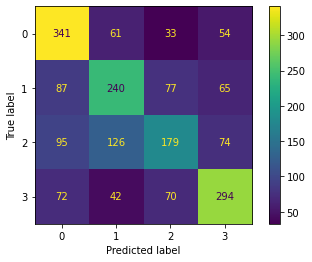

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.362437129020691. Accuracy: 36.28272% F1-macro: 29.45% F1-weighted: 29.30% cohen_kappa: 0.15%
Iteration: 2000. Loss: 1.3674386739730835. Accuracy: 46.38743% F1-macro: 46.52% F1-weighted: 46.62% cohen_kappa: 0.29%
Iteration: 3000. Loss: 1.0288640260696411. Accuracy: 44.03141% F1-macro: 40.78% F1-weighted: 40.93% cohen_kappa: 0.25%
Iteration: 4000. Loss: 1.28558349609375. Accuracy: 52.87958% F1-macro: 51.43% F1-weighted: 51.54% cohen_kappa: 0.37%
Iteration: 5000. Loss: 1.1816374063491821. Accuracy: 51.41361% F1-macro: 49.01% F1-weighted: 49.16% cohen_kappa: 0.35%
Iteration: 6000. Loss: 1.2239845991134644. Accuracy: 53.08901% F1-macro: 52.52% F1-weighted: 52.63% cohen_kappa: 0.37%
Iteration: 7000. Loss: 0.9661935567855835. Accuracy: 52.40838% F1-macro: 52.52% F1-weighted: 52.60% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.142901062965393. Accuracy: 53.40314% F1-macro: 52.81% F1-weighted: 52.93% cohen_kappa: 0.38%
Iteration: 9000. Loss: 1.0

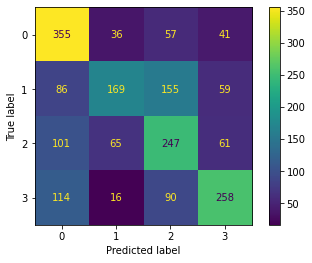

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'RAdam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.443396806716919. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.1310393810272217. Accuracy: 55.98746% F1-macro: 32.08% F1-weighted: 45.86% cohen_kappa: 0.27%
Iteration: 3000. Loss: 1.212936520576477. Accuracy: 55.89342% F1-macro: 35.01% F1-weighted: 47.05% cohen_kappa: 0.23%
Iteration: 4000. Loss: 1.163278579711914. Accuracy: 59.37304% F1-macro: 41.48% F1-weighted: 53.15% cohen_kappa: 0.36%
Iteration: 5000. Loss: 1.0908873081207275. Accuracy: 60.25078% F1-macro: 44.02% F1-weighted: 54.96% cohen_kappa: 0.37%
Iteration: 6000. Loss: 1.3418887853622437. Accuracy: 57.21003% F1-macro: 36.87% F1-weighted: 48.45% cohen_kappa: 0.24%
Iteration: 7000. Loss: 0.9595878720283508. Accuracy: 60.87774% F1-macro: 45.21% F1-weighted: 55.65% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.1257597208023071. Accuracy: 61.19122% F1-macro: 44.53% F1-weighted: 55.08% cohen_kappa: 0.36%
Uncertainity: 0.9447353


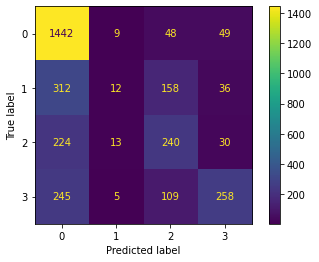

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'Adam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2041511535644531. Accuracy: 52.16301% F1-macro: 25.08% F1-weighted: 39.20% cohen_kappa: 0.11%
Iteration: 2000. Loss: 1.1638747453689575. Accuracy: 58.30721% F1-macro: 40.32% F1-weighted: 51.61% cohen_kappa: 0.32%
Iteration: 3000. Loss: 1.2027252912521362. Accuracy: 58.93417% F1-macro: 39.92% F1-weighted: 51.39% cohen_kappa: 0.31%
Iteration: 4000. Loss: 1.3020991086959839. Accuracy: 59.59248% F1-macro: 41.18% F1-weighted: 52.62% cohen_kappa: 0.34%
Iteration: 5000. Loss: 1.0158840417861938. Accuracy: 58.18182% F1-macro: 42.05% F1-weighted: 53.69% cohen_kappa: 0.36%
Iteration: 6000. Loss: 0.9991178512573242. Accuracy: 61.53605% F1-macro: 45.21% F1-weighted: 55.96% cohen_kappa: 0.38%
Iteration: 7000. Loss: 1.0144336223602295. Accuracy: 61.00313% F1-macro: 43.97% F1-weighted: 55.07% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.144396424293518. Accuracy: 59.24765% F1-macro: 39.98% F1-weighted: 51.28% cohen_kappa: 0.30%
Uncertainity: 0.749229

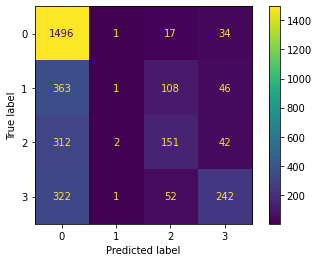

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2908878326416016. Accuracy: 48.87147% F1-macro: 27.80% F1-weighted: 41.46% cohen_kappa: 0.22%
Iteration: 2000. Loss: 1.0442118644714355. Accuracy: 53.54232% F1-macro: 29.46% F1-weighted: 42.49% cohen_kappa: 0.15%
Iteration: 3000. Loss: 1.1626074314117432. Accuracy: 57.86834% F1-macro: 37.11% F1-weighted: 49.40% cohen_kappa: 0.28%
Iteration: 4000. Loss: 0.8643758893013. Accuracy: 57.89969% F1-macro: 43.74% F1-weighted: 54.10% cohen_kappa: 0.33%
Iteration: 5000. Loss: 1.0255200862884521. Accuracy: 58.62069% F1-macro: 37.72% F1-weighted: 50.00% cohen_kappa: 0.30%
Iteration: 6000. Loss: 1.1584763526916504. Accuracy: 59.68652% F1-macro: 45.85% F1-weighted: 56.32% cohen_kappa: 0.38%
Iteration: 7000. Loss: 0.9175146818161011. Accuracy: 60.03135% F1-macro: 48.59% F1-weighted: 57.82% cohen_kappa: 0.39%
Iteration: 8000. Loss: 0.9243193864822388. Accuracy: 61.44201% F1-macro: 48.36% F1-weighted: 57.99% cohen_kappa: 0.40%
Uncertainity: 1.1109099


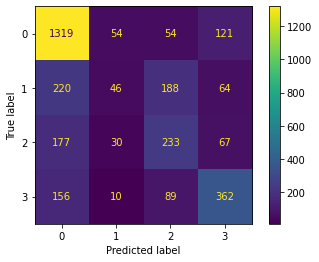

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.8437229990959167. Accuracy: 48.52665% F1-macro: 16.34% F1-weighted: 31.71% cohen_kappa: 0.00%
Iteration: 2000. Loss: 1.1597305536270142. Accuracy: 52.97806% F1-macro: 27.78% F1-weighted: 41.79% cohen_kappa: 0.18%
Iteration: 3000. Loss: 1.031318187713623. Accuracy: 56.17555% F1-macro: 34.67% F1-weighted: 47.63% cohen_kappa: 0.28%
Iteration: 4000. Loss: 1.1469484567642212. Accuracy: 58.08777% F1-macro: 39.85% F1-weighted: 51.19% cohen_kappa: 0.31%
Iteration: 5000. Loss: 1.1032435894012451. Accuracy: 59.84326% F1-macro: 44.15% F1-weighted: 54.57% cohen_kappa: 0.36%
Iteration: 6000. Loss: 0.8896519541740417. Accuracy: 59.09091% F1-macro: 44.22% F1-weighted: 54.75% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.29093337059021. Accuracy: 59.12226% F1-macro: 43.46% F1-weighted: 54.37% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.1961675882339478. Accuracy: 60.18809% F1-macro: 43.61% F1-weighted: 54.83% cohen_kappa: 0.37%
Uncertainity: 0.97125053

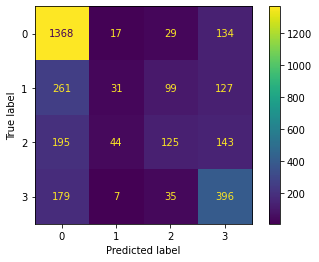

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2710627317428589. Accuracy: 49.84326% F1-macro: 22.52% F1-weighted: 36.99% cohen_kappa: 0.08%
Iteration: 2000. Loss: 1.002155065536499. Accuracy: 55.48589% F1-macro: 36.40% F1-weighted: 48.86% cohen_kappa: 0.30%
Iteration: 3000. Loss: 0.9409123659133911. Accuracy: 59.09091% F1-macro: 41.50% F1-weighted: 52.58% cohen_kappa: 0.33%
Iteration: 4000. Loss: 1.342527151107788. Accuracy: 59.84326% F1-macro: 42.66% F1-weighted: 53.41% cohen_kappa: 0.33%
Iteration: 5000. Loss: 1.046316146850586. Accuracy: 59.74922% F1-macro: 46.32% F1-weighted: 56.38% cohen_kappa: 0.35%
Iteration: 6000. Loss: 0.9431256055831909. Accuracy: 59.87461% F1-macro: 43.96% F1-weighted: 54.43% cohen_kappa: 0.33%
Iteration: 7000. Loss: 1.1027709245681763. Accuracy: 61.28527% F1-macro: 47.28% F1-weighted: 57.20% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.1414340734481812. Accuracy: 59.21630% F1-macro: 43.01% F1-weighted: 53.57% cohen_kappa: 0.31%
Uncertainity: 0.8555254


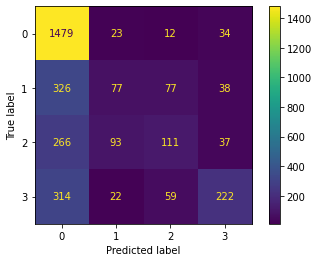

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2684351205825806. Accuracy: 49.52978% F1-macro: 20.10% F1-weighted: 34.89% cohen_kappa: 0.04%
Iteration: 2000. Loss: 1.3576886653900146. Accuracy: 57.02194% F1-macro: 40.61% F1-weighted: 51.74% cohen_kappa: 0.33%
Iteration: 3000. Loss: 0.9253154993057251. Accuracy: 59.87461% F1-macro: 42.78% F1-weighted: 53.81% cohen_kappa: 0.36%
Iteration: 4000. Loss: 0.9904186129570007. Accuracy: 59.49843% F1-macro: 44.54% F1-weighted: 54.80% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.098076343536377. Accuracy: 60.06270% F1-macro: 45.06% F1-weighted: 55.59% cohen_kappa: 0.36%
Iteration: 6000. Loss: 1.2349505424499512. Accuracy: 60.62696% F1-macro: 42.92% F1-weighted: 54.14% cohen_kappa: 0.36%
Iteration: 7000. Loss: 1.1347657442092896. Accuracy: 61.41066% F1-macro: 43.76% F1-weighted: 54.89% cohen_kappa: 0.37%
Iteration: 8000. Loss: 1.0777943134307861. Accuracy: 59.84326% F1-macro: 43.61% F1-weighted: 54.42% cohen_kappa: 0.34%
Uncertainity: 0.936545

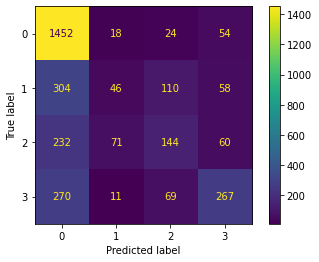

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 256) #For uni Directional
      self.fc_3 = nn.Linear(256, 128) #For uni Directional
      self.fc_4 = nn.Linear(128, 64) #For uni Directional
      self.fc_5 = nn.Linear(64, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_4(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_5(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

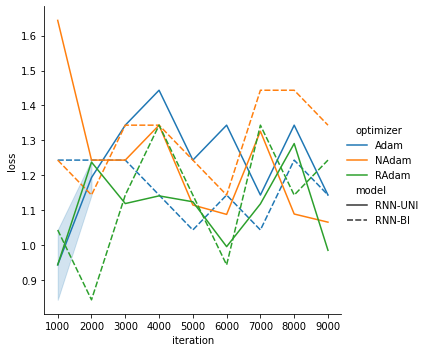

In [ ]:
# loss function plot for balanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

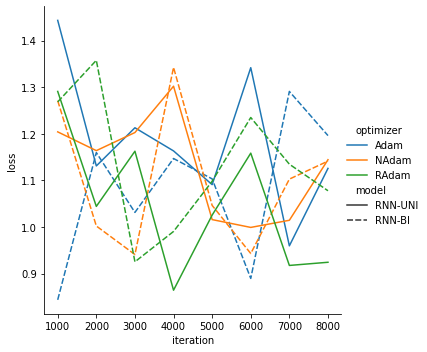

In [ ]:
# loss function plot for imbalanced dataset

plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 06:54:05.685009
